In [1]:
# import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

edu_data = pd.read_csv("PandasTestCSV.csv")
edu_data = edu_data.rename(index=str,columns={"Unnamed: 1":"Country"}) #renamed country column
edu_data = edu_data.iloc[:,1:14]

pretty_lit_countries = edu_data[edu_data['(avg) youth lit rate'] > 85] 
#countries w avg youth literacy rates > 85%

edu_data_ind_by_country = edu_data.set_index('Country')

edu_data_avg = edu_data.drop(labels=["(m) youth lit rate", "(f) youth lit rate",
                                     "(m) pps gross enrollment %", "(f) pps gross enrollment %",
                                     "(m) ps gross enrollment %", "(f) ps gross enrollment %",
                                     "(m) lss net enrollment %","(f) lss net enrollment %"],
                            axis=1)

edu_data_avg_na_dropped = edu_data_avg.dropna()

edu_data = edu_data.dropna()

edu_data_ind_by_country = edu_data.set_index('Country')

edu = edu_data
edu_c_ind = edu_data_ind_by_country
edu_avg = edu.drop(labels=["(m) youth lit rate", "(f) youth lit rate",
                                     "(m) pps gross enrollment %", "(f) pps gross enrollment %",
                                     "(m) ps gross enrollment %", "(f) ps gross enrollment %",
                                     "(m) lss net enrollment %","(f) lss net enrollment %"],
                            axis=1)
high_literacy = edu_avg[edu_avg["(avg) youth lit rate"]>=95]
low_literacy = edu_avg[edu_avg["(avg) youth lit rate"]<55]

e = "Europe"
a = "Africa"
ap = "Asia and Pacific"
sl = "South/Latin America"
ab = "Arab States"
n = "None"
regions = np.array([
    [e],[a],[ap],[a],[a],[ap],[a],[a],
    [sl],[ab],[sl],[a],[sl],[n],[n],[ab],
    [sl],[a],[a],[a],[a],[sl],[a],[sl],
    [sl],[sl],[ap],[ab],[ap],[n],[n],[a],
    [a],[ap],[a],[ab],[sl],[n],[e],[a],
    [ap],[a],[ap],[sl],[sl],[e],[e],[a],
    [a],[a],[e],[a],[a],[ab],[a],[sl],
    [a],[ap],[ap],[ap],[e],[sl],[n],[a]
])
regions = np.array([
    e,a,ap,a,a,ap,a,a,
    sl,ab,sl,a,sl,n,n,ab,
    sl,a,a,a,a,sl,a,sl,
    sl,sl,ap,ab,ap,n,n,a,
    a,ap,a,ab,sl,n,e,a,
    ap,a,ap,sl,sl,e,e,a,
    a,a,e,a,a,ab,a,sl,
    a,ap,ap,ap,e,sl,n,a
])
edu_avg["Regions"] = regions.tolist()


wtf = edu_avg[edu_avg["(avg) pps gross enrollment %"]>100]
wtf
edu_avg = edu_avg[edu_avg["(avg) pps gross enrollment %"]<=100]
edu_avg

,Country,(avg) youth lit rate,(avg) pps gross enrollment %,(avg) ps gross enrollment %,(avg) lss net enrollment %,Regions
0,Albania,99.0,89.0,114.0,91.0,Europe
1,Benin,52.0,24.0,129.0,45.0,Africa
2,Bhutan,87.0,26.0,100.0,62.0,Asia and Pacific
3,Burkina Faso,50.0,4.0,88.0,26.0,Africa
4,Burundi,80.0,13.0,124.0,23.0,Africa
5,Cambodia,87.0,18.0,117.0,46.0,Asia and Pacific
6,Cameroon,81.0,38.0,117.0,42.0,Africa
7,Central African Republic,38.0,6.0,94.0,12.0,Africa
8,Colombia,99.0,84.0,114.0,75.0,South/Latin America
9,Comoros,72.0,21.0,103.0,40.0,Arab States


# Main Final Datasets

**edu**: full data on countries and their statistics on youth literacy rates, pre-primary school enrollment, primary school enrollment, and lower secondary school enrollment.

**edu_c_ind**: (stands for education country index) same data as **edu**, but with the countries as index instead of numbers.

**edu_avg**: data in **edu**, missing the male and female columns to quickly see data on just the averages for each country.

In [2]:
africa_edu_avg = edu_avg[edu_avg["Regions"]=="Africa"]
europe_edu_avg = edu_avg[edu_avg["Regions"]=="Europe"]
ap_edu_avg = edu_avg[edu_avg["Regions"]=="Asia and Pacific"]
slat_edu_avg = edu_avg[edu_avg["Regions"]=="South/Latin America"]
ab_edu_avg = edu_avg[edu_avg["Regions"]=="Arab States"]

In [17]:
africa_edu_avg.sort_values(by=['(avg) ps gross enrollment %'])

,Country,(avg) youth lit rate,(avg) pps gross enrollment %,(avg) ps gross enrollment %,(avg) lss net enrollment %,Regions
17,Eritrea,87.0,13.0,50.0,19.0,Africa
52,South Sudan,37.0,10.0,64.0,1.0,Africa
41,Niger,25.0,7.0,72.0,20.0,Africa
34,Mali,50.0,4.0,76.0,31.0,Africa
49,Senegal,56.0,15.0,82.0,41.0,Africa
3,Burkina Faso,50.0,4.0,88.0,26.0,Africa
22,Guinea,47.0,15.0,91.0,29.0,Africa
19,Gambia,61.0,38.0,92.0,38.0,Africa
7,Central African Republic,38.0,6.0,94.0,12.0,Africa
11,Côte d'Ivoire,53.0,7.0,94.0,34.0,Africa


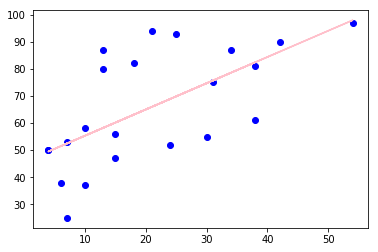

In [3]:
#Africa
y = africa_edu_avg.loc[:,["(avg) youth lit rate"]].values
x = africa_edu_avg.loc[:,["(avg) pps gross enrollment %"]].values
regressor = LinearRegression().fit(x, y)
y_pred = regressor.predict(x)
plt.scatter(x,y, color="blue")
plt.plot(x,y_pred, color="pink")

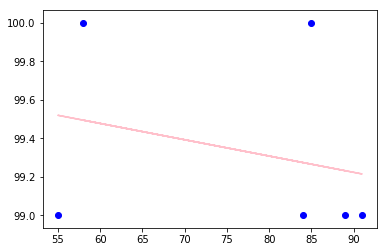

In [4]:
#Europe
y = europe_edu_avg.loc[:,["(avg) youth lit rate"]].values
x = europe_edu_avg.loc[:,["(avg) pps gross enrollment %"]].values
regressor = LinearRegression().fit(x, y)
y_pred = regressor.predict(x)
plt.scatter(x,y, color="blue")
plt.plot(x,y_pred, color="pink")

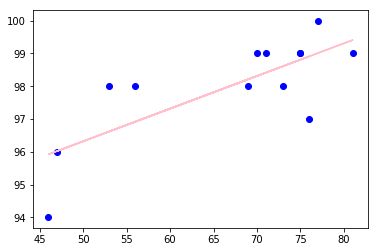

In [14]:
#South/Latin America
y = slat_edu_avg.loc[:,["(avg) youth lit rate"]].values
x = slat_edu_avg.loc[:,["(avg) lss net enrollment %"]].values
regressor = LinearRegression().fit(x, y)
y_pred = regressor.predict(x)
plt.scatter(x,y, color="blue")
plt.plot(x,y_pred, color="pink")

In [15]:
regressor.coef_, regressor.intercept_

(array([[0.09955476]]), array([91.34514693]))

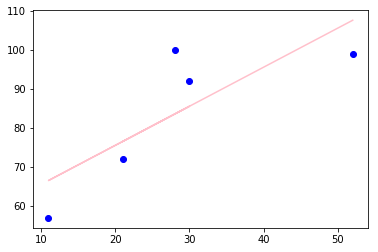

In [6]:
#Arab States
y = ab_edu_avg.loc[:,["(avg) youth lit rate"]].values
x = ab_edu_avg.loc[:,["(avg) pps gross enrollment %"]].values
regressor = LinearRegression().fit(x, y)
y_pred = regressor.predict(x)
plt.scatter(x,y, color="blue")
plt.plot(x,y_pred, color="pink")

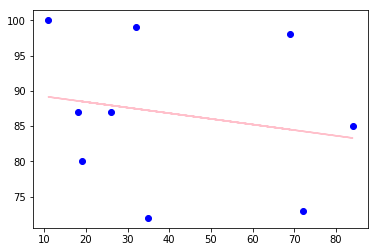

In [7]:
#Asia and Pacific
y = ap_edu_avg.loc[:,["(avg) youth lit rate"]].values
x = ap_edu_avg.loc[:,["(avg) pps gross enrollment %"]].values
regressor = LinearRegression().fit(x, y)
y_pred = regressor.predict(x)
plt.scatter(x,y, color="blue")
plt.plot(x,y_pred, color="pink")

In [8]:
regressor.coef_, regressor.intercept_

(array([[-0.07979936]]), array([90.02295182]))

In [9]:
corr_afr = africa_edu_avg.corr() 
corr_afr.style.background_gradient()

,(avg) youth lit rate,(avg) pps gross enrollment %,(avg) ps gross enrollment %,(avg) lss net enrollment %
(avg) youth lit rate,1,0.637164,0.41567,0.447861
(avg) pps gross enrollment %,0.637164,1,0.373947,0.619888
(avg) ps gross enrollment %,0.41567,0.373947,1,0.441478
(avg) lss net enrollment %,0.447861,0.619888,0.441478,1


In [10]:
corr_eu = europe_edu_avg.corr() 
corr_eu.style.background_gradient()

,(avg) youth lit rate,(avg) pps gross enrollment %,(avg) ps gross enrollment %,(avg) lss net enrollment %
(avg) youth lit rate,1,-0.264415,0.28554,0.594606
(avg) pps gross enrollment %,-0.264415,1,0.160611,-0.701455
(avg) ps gross enrollment %,0.28554,0.160611,1,0.506739
(avg) lss net enrollment %,0.594606,-0.701455,0.506739,1


In [11]:
corr_ab = ab_edu_avg.corr() 
corr_ab.style.background_gradient()

,(avg) youth lit rate,(avg) pps gross enrollment %,(avg) ps gross enrollment %,(avg) lss net enrollment %
(avg) youth lit rate,1,0.805834,-0.0986053,0.98627
(avg) pps gross enrollment %,0.805834,1,-0.664108,0.770872
(avg) ps gross enrollment %,-0.0986053,-0.664108,1,-0.0582922
(avg) lss net enrollment %,0.98627,0.770872,-0.0582922,1


In [12]:
corr_ap = ap_edu_avg.corr() 
corr_ap.style.background_gradient()

,(avg) youth lit rate,(avg) pps gross enrollment %,(avg) ps gross enrollment %,(avg) lss net enrollment %
(avg) youth lit rate,1,-0.202566,-0.267548,0.803604
(avg) pps gross enrollment %,-0.202566,1,0.055723,-0.134154
(avg) ps gross enrollment %,-0.267548,0.055723,1,-0.595172
(avg) lss net enrollment %,0.803604,-0.134154,-0.595172,1


In [13]:
corr_slat = slat_edu_avg.corr() 
corr_slat.style.background_gradient()

,(avg) youth lit rate,(avg) pps gross enrollment %,(avg) ps gross enrollment %,(avg) lss net enrollment %
(avg) youth lit rate,1,0.347455,0.210799,0.7555
(avg) pps gross enrollment %,0.347455,1,0.0376094,0.399875
(avg) ps gross enrollment %,0.210799,0.0376094,1,-0.254638
(avg) lss net enrollment %,0.7555,0.399875,-0.254638,1
